![title](img/keras_logo.png)

##### KERAS INTRODUCTION #####

Keras is a high level, deep learning API written in Python. It was developed by Google for implementation of neural networks[1]. Its primary author is François Chollet. Keras is considered slower than other deep learning frameworks but more user friendly.
Frameworks supported by Keras are Tensorflow, Theano, PlaidML, MXNet, CNTK (Microsoft Cognitive Toolkit). [2]


![title](img/BackEnd.png)

TensorFlow has made Keras its official high-level API and Keras and it is embedded in TensorFlow.

#### TensorFlow ####

TensorFlow is an open source, end to end framework for machine learning and use in artificial intelligence. Developed by Google, TensorFlow can be used with multiple programming languages including Python, Java & C ++ leading to its use in many applications.

TensorFlow has many features, among them it's ability to work efficiently with mathematical formulas involving multi-dimensional arrays. It also has strong support for nueral networks and machine learning concepts which I will speak about further below. [4]

##### Anomaly Detection ####

https://keras.io/examples/timeseries/timeseries_anomaly_detection/

In [11]:
# Importing Numpy for numerical arrays

import numpy as np

# Importing Pandas for creating dataframes

import pandas as pd

# Importing Keras from tensorflow library - Neural Networks

from tensorflow import keras

# Importing layers of Neural Networks

from tensorflow.keras import layers

# Importing pyplot for plotting figures

from matplotlib import pyplot as plt


#### Load the Data

https://www.kaggle.com/datasets/boltzmannbrain/nab

The Keras model is using data from the Numenta Anomaly Benchmark (NAB) dataset. The (NAB) is a novel benchmark for evaluating algorithms for anomaly detection in streaming, online applications. It is comprised of over 50 labeled real-world and artificial timeseries data files plus a novel scoring mechanism designed for real-time applications. All of the data and code is fully open-source.

The below model uses two of these datasets - art_daily_small_noise.csv & art_daily_jumpsup.csv.

In [17]:
# Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly.
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'



In [18]:
no_anomaly_url



'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_small_noise.csv'

In [19]:
with_anomaly_url



'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/art_daily_jumpsup.csv'

#### No Anomaly #### 

In [20]:
# Print data without anomaly. Defaults to first 5 rows but this can be changed by inserting a number.

print(df_small_noise.head()) 


                         value
timestamp                     
2014-04-01 00:00:00  18.324919
2014-04-01 00:05:00  21.970327
2014-04-01 00:10:00  18.624806
2014-04-01 00:15:00  21.953684
2014-04-01 00:20:00  21.909120


In [21]:
# Using Pandas'shape' attribute to get the shape of the data.

df_small_noise.shape

(4032, 1)

4032 rows & 1 column

In [22]:
# Getting descriptive stats - No anomaly

df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


The 'describe' function gives a overview of the data in the file.

Count - # of rows of data.

Mean - The average value.

STD - Standard deviation of the values.

Min - Minimum value observed.

Percentiles - 25, 50 & 75. 50 is the same as the median. From the above, we can see that 25% of values are 19.841 or lower. 75 % of values are 75.450 or lower.

Max - The maximum observed value.



In [23]:
# Plotting Data - No anomaly

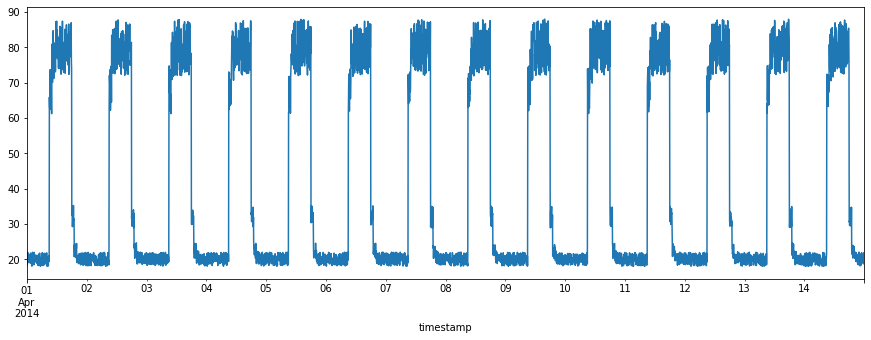

In [24]:
fig, ax = plt.subplots(figsize = (15,5))
df_small_noise.plot(legend=False, ax=ax)
plt.show()


#### With Anomaly ####

In [25]:
print(df_daily_jumpsup.head())

                         value
timestamp                     
2014-04-01 00:00:00  19.761252
2014-04-01 00:05:00  20.500833
2014-04-01 00:10:00  19.961641
2014-04-01 00:15:00  21.490266
2014-04-01 00:20:00  20.187739


In [26]:
df_daily_jumpsup.shape

(4032, 1)

Again, 4032 rows & 1 column


In [27]:
df_daily_jumpsup.describe()

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


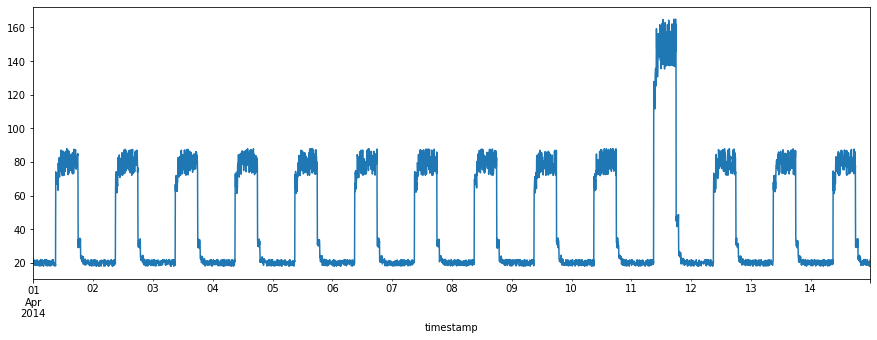

In [28]:
fig, ax = plt.subplots(figsize = (15,5))
df_daily_jumpsup.plot(legend=False, ax=ax)
plt.show()


Using the same functions as we did on the dataset without an anomaly, we can see the difference most clearly in the graph above.  The values between the 11th & 12th are clearly out of sync with the other dates.

#### Preprocessing

In [29]:


# 
train_mean = df_small_noise.mean()

train_mean



value    42.438353
dtype: float64

In [30]:


# 
train_std = df_small_noise.std()

train_std



value    28.077122
dtype: float64

In [31]:


# 
df_train_vals = (df_small_noise - train_mean) / train_std



In [32]:


# 
df_train_vals.head()



,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


In [33]:


# 
df_small_noise['less_mean'] = df_small_noise['value'] - df_small_noise['value'].mean()
df_small_noise['div_std'] = df_small_noise['less_mean'] / df_small_noise['value'].std()



In [34]:


df_small_noise



,value,less_mean,div_std
timestamp,,,
2014-04-01 00:00:00,18.324919,-24.113435,-0.858829
2014-04-01 00:05:00,21.970327,-20.468026,-0.728993
2014-04-01 00:10:00,18.624806,-23.813547,-0.848148
2014-04-01 00:15:00,21.953684,-20.484669,-0.729586
2014-04-01 00:20:00,21.909120,-20.529234,-0.731173
...,...,...,...
2014-04-14 23:35:00,20.211195,-22.227159,-0.791647
2014-04-14 23:40:00,20.531041,-21.907313,-0.780255
2014-04-14 23:45:00,19.032127,-23.406226,-0.833640


In [35]:


df_small_noise['value'].mean(), df_small_noise['less_mean'].mean(), df_small_noise['div_std'].mean()



(42.438353335806646, -7.342627387941552e-14, -2.616541242931684e-15)

In [36]:


df_small_noise['value'].std(), df_small_noise['less_mean'].std(), df_small_noise['div_std'].std()



(28.077122281262515, 28.077122281262508, 1.0000000000000018)

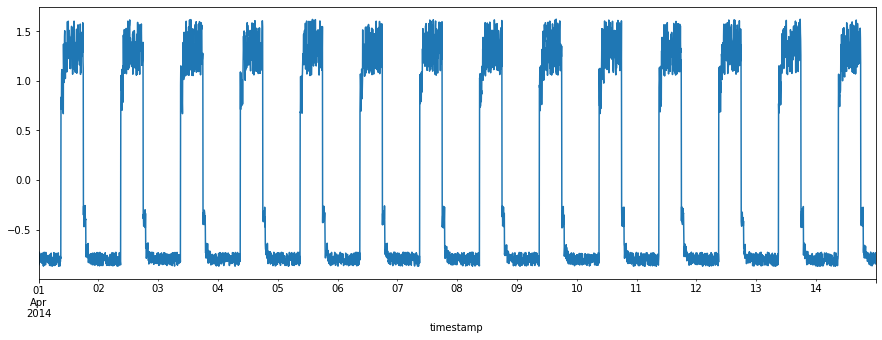

In [37]:


# 
fig, ax = plt.subplots(figsize=(15,5))

# Use pandas to plot data frame.
df_train_vals.plot(legend=False, ax=ax);



In [38]:


# 
df_train_vals.shape



(4032, 1)

In [39]:


# 
window_size = 288





Window example:

[1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]

window_size = 3

[1, 1, 2]

[1, 2, 4]

[2, 4, 5]

[4, 5, 6]

...



In [40]:


# Window list example.
L = [1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
# Example window size.
win_size = 3
# Length of L.
len(L)



12

In [41]:
# Number of windows from L.
len(L) - (win_size - 1)

10

In [42]:
# Print the windows.
for i in range(len(L) - win_size + 1):
    print(L[i:i + win_size])

[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
[5, 6, 7]
[6, 7, 1]
[7, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]


In [43]:


# For accumulating the windows.
wins = []

# Generate the windows
for i in range(len(L) - win_size + 1):
    wins.append(L[i:i + win_size])

wins



[[1, 1, 2],
 [1, 2, 4],
 [2, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 1],
 [7, 1, 2],
 [1, 2, 3],
 [2, 3, 4],
 [3, 4, 5]]

In [44]:


# Create a 2D numpy array from wins.
np.stack(wins)



array([[1, 1, 2],
       [1, 2, 4],
       [2, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 1],
       [7, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

In [45]:
# 
def windows(vals, N=window_size):
  # 
  L = []
  # 
  for i in range(len(vals) - N + 1):
    # 
    L.append(vals[i:i+N])
  # Stack
  return np.stack(L)

In [46]:
# 
x_train = windows(df_train_vals)

In [47]:


# 
x_train[0][0], x_train[-1][-1]



(array([-0.85882857]), array([-0.8460886]))

In [48]:


# 
df_train_vals.iloc[0], df_train_vals.iloc[-1]



(value   -0.858829
 Name: 2014-04-01 00:00:00, dtype: float64,
 value   -0.846089
 Name: 2014-04-14 23:55:00, dtype: float64)

In [49]:
# 
x_train.shape

(3745, 288, 1)

In [50]:


#
df_train_vals['value'].values



array([-0.85882857, -0.72899302, -0.84814772, ..., -0.83364049,
       -0.73510213, -0.8460886 ])

In [51]:


# 
x_train[0].flatten()



array([-0.85882857, -0.72899302, -0.84814772, -0.72958579, -0.731173  ,
       -0.75730984, -0.77645641, -0.7880838 , -0.747012  , -0.829166  ,
       -0.80377285, -0.7821597 , -0.81182078, -0.80949918, -0.82334701,
       -0.79001779, -0.74922405, -0.84169024, -0.73727717, -0.77223023,
       -0.75311352, -0.79116337, -0.75934728, -0.86809294, -0.75381057,
       -0.86468256, -0.74361965, -0.72908121, -0.82850668, -0.84043795,
       -0.76136364, -0.8343536 , -0.74708881, -0.85574949, -0.85245676,
       -0.73090636, -0.77440264, -0.74974936, -0.82419543, -0.77402585,
       -0.78574242, -0.7844733 , -0.77316412, -0.78843253, -0.80927467,
       -0.83109167, -0.76090519, -0.83816509, -0.77176485, -0.83715923,
       -0.78131343, -0.76396862, -0.83924191, -0.86186112, -0.85174179,
       -0.78406773, -0.74938477, -0.86399047, -0.76581026, -0.82177506,
       -0.80222751, -0.73807119, -0.82310669, -0.80410682, -0.86845167,
       -0.85877599, -0.83356075, -0.86643297, -0.78045221, -0.80

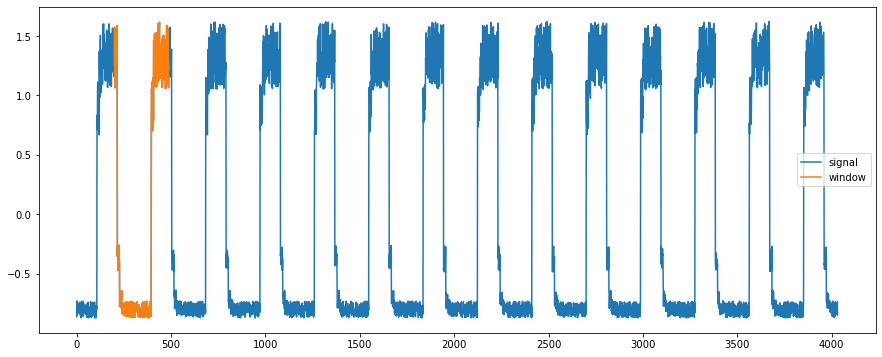

In [52]:


# 
window_no = 200

# 
fig, ax = plt.subplots(figsize=(15, 6))

# 
y = df_train_vals['value'].values

# 
ax.plot(np.arange(y.shape[0]), y, label='signal')

# The first window.
w = x_train[window_no].flatten()

# 
ax.plot(np.arange(w.shape[0]) + window_no, w, label='window')

ax.legend();



#### Neural Network

In [53]:


x_train.shape



(3745, 288, 1)

In [54]:
#
layers = [
  #
  keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
  #
  keras.layers.Conv1D(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1D(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1DTranspose(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
]



In [55]:
#
model = keras.Sequential(layers)



In [56]:
# 
optimizer = keras.optimizers.Adam(learning_rate=0.001)



In [57]:
# 
model.compile(optimizer=optimizer, loss="mse")



In [58]:
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

In [59]:
# 
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)



Epoch 1/50
27/27 [==============================] - 3s 64ms/step - loss: 0.5242 - val_loss: 0.1095
Epoch 2/50
27/27 [==============================] - 1s 53ms/step - loss: 0.0831 - val_loss: 0.0431
Epoch 3/50
27/27 [==============================] - 2s 63ms/step - loss: 0.0600 - val_loss: 0.0384
Epoch 4/50
27/27 [==============================] - 2s 66ms/step - loss: 0.0509 - val_loss: 0.0332
Epoch 5/50
27/27 [==============================] - 2s 66ms/step - loss: 0.0445 - val_loss: 0.0292
Epoch 6/50
27/27 [==============================] - 2s 61ms/step - loss: 0.0398 - val_loss: 0.0272
Epoch 7/50
27/27 [==============================] - 2s 61ms/step - loss: 0.0362 - val_loss: 0.0250
Epoch 8/50
27/27 [==============================] - 2s 64ms/step - loss: 0.0331 - val_loss: 0.0239
Epoch 9/50
27/27 [==============================] - 2s 59ms/step - loss: 0.0304 - val_loss: 0.0224
Epoch 10/50
27/27 [==============================] - 1s 54ms/step - loss: 0.0282 - val_loss: 0.0205
Epoch 11/